In [2]:
from pygsm import GSMObserver
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
from datetime import datetime
from astropy.io import fits

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


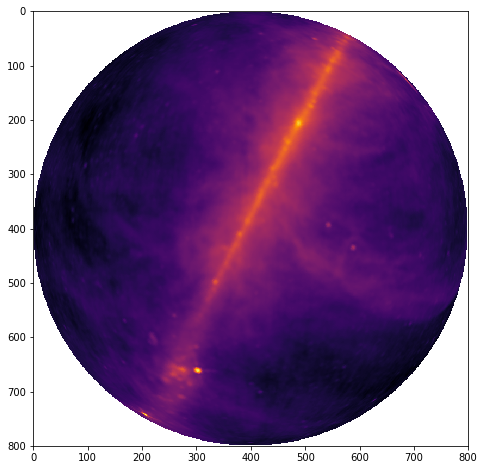

In [8]:
gsm = GSMObserver()
(latitude, longitude, elevation) = ('-30.7224', '21.4278', 1100)
gsm.latitude = latitude
gsm.longitude = longitude
gsm.elevation = elevation

proj_sky = hp.projector.OrthographicProj(rot=[0,0,0], half_sky=True, xsize=800)

observed_sky = gsm.generate(150)

nside_sky = hp.pixelfunc.npix2nside(hp.pixelfunc.get_map_size(observed_sky))
f_sky = lambda x,y,z: hp.pixelfunc.vec2pix(nside_sky, x, y, z, nest=False)
sky = proj_sky.projmap(observed_sky, f_sky)


t = 12

dt = datetime(2013, 1, 1, np.int(t), np.int(60.0 * (t - np.floor(t))),
                      np.int(60.0 * (60.0 * t - np.floor(t * 60.0))))

gsm.date = dt

observed_sky = gsm.generate(150)
sky = proj_sky.projmap(observed_sky, f_sky)


plt.figure(figsize=(8,8))
plt.imshow(np.log10(sky), cmap='inferno')
plt.savefig('/Users/tyler/Downloads/sky_150MHz.png', dpi=200, bbox_inches='tight', pad_inches=0)

In [9]:
hera_beam_file = '/Users/tyler/Folders/Research/HERA/Tsys/data/HERA_beam_nic.hmap'

hera_im = fits.getdata(hera_beam_file, extname='BEAM_{0}'.format('X'))
nside = hp.npix2nside(hera_im.shape[0])
f = lambda x,y,z: hp.pixelfunc.vec2pix(nside,x,y,z,nest=False)
proj_beam = hp.projector.OrthographicProj(rot=[0,90], half_sky=True, xsize=800)

beam = proj_beam.projmap(hera_im[:, 100], f)

In [10]:
beam.shape

(800, 800)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


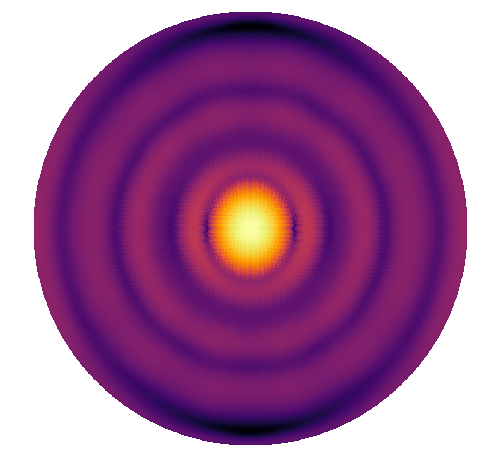

In [11]:
fig = plt.figure(figsize=(8,8))
plt.imshow(np.log10(beam), cmap='inferno')
plt.axis('off')
plt.savefig('/Users/tyler/Downloads/beam_150MHz.png', bbox_inches='tight', pad_inches=0, dpi=200)
